In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right CINGULATE of subjects in HCP, CCD and CCD Controls after implementing a betaVAE, with HCP as training set

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

In [16]:
#Load files

Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-03-49/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-03-49/CCD/Embeddings.csv")

Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-03-49/Reconstruction_error.csv")
Reconstruc_error_CCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-16/15-03-49/CCD/Reconstruction_error.csv")

In [17]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [18]:
Participants_CCD

,Index,Diagnosis
0,ag080048,control
1,bt080019,control
2,cd100556,control
3,fb070174,control
4,md110095,control
5,mm080047,control
6,vp100400,control
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD


In [19]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [20]:
CCD_Subjects

,Index,Diagnosis
7,ca090293,CCD
8,cr070055,CCD
9,gd070065,CCD
10,lc110401,CCD
11,np090301,CCD
12,pa080037,CCD
13,pz080261,CCD


In [21]:
Embeddings_CCD

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,ag080048,1.032584,-0.101611,0.410214,-0.661479,-0.206346,-0.350455,-0.279203,0.929269,-0.223651,...,-0.386816,-1.889754,0.500305,0.048406,0.384762,-0.283740,1.063361,-0.069384,0.617866,1.844217
1,bt080019,-0.473674,-0.685474,-0.728148,-0.203902,-0.104128,-0.929808,-1.109091,-0.333588,-0.048304,...,1.225051,0.714245,0.579818,1.139797,-0.729647,-0.530928,-0.396282,0.119803,-0.499869,-1.018754
2,ca090293,0.831488,-1.099847,0.477227,1.025414,0.382574,-1.607342,-0.517920,-0.097077,-1.395934,...,1.657863,1.778039,0.282285,-0.771517,-0.344795,-0.438849,0.632185,-0.509695,1.293737,0.499384
3,cd100556,-0.610294,0.156684,0.718285,0.364222,0.273288,-0.994749,-0.958474,1.134613,0.301020,...,1.489301,0.214442,0.020582,-1.924464,0.167873,0.346015,-0.049420,-0.310932,-0.051631,-1.041660
4,cr070055,-1.708443,0.190930,0.193575,-0.086549,-0.580089,-1.073983,-1.044450,-0.407522,0.422628,...,0.702738,0.098385,0.628038,0.188889,0.447920,-0.473879,0.679803,-0.334051,-0.623944,-1.045795
5,fb070174,-1.319424,0.143721,1.771724,1.068537,0.189004,0.133303,-1.090592,-0.487820,0.541561,...,0.887551,0.152519,0.115574,1.146488,0.174757,0.020083,0.641292,0.346415,-1.659565,-0.534883
6,gd070065,-0.131172,0.168482,0.638114,1.479558,-0.597562,0.500046,-1.697745,-0.299771,0.695806,...,0.372470,-0.193756,0.408745,0.991532,1.016584,-1.452912,0.285008,0.017252,-0.484478,-0.966347
7,lc110410,-0.658052,1.225873,-0.264018,0.027175,-0.047109,-0.860673,-0.868788,-0.740090,-0.258356,...,-0.294011,-0.051428,0.559716,-0.528088,0.367541,-1.227867,1.067673,-0.153425,-0.547141,-0.087651
8,md110095,0.483063,-0.500648,-0.008557,-0.487084,-0.058213,-2.117545,0.234500,0.187030,-0.441169,...,-0.224805,0.376227,-0.401412,0.681883,-0.349681,-0.533285,-0.659909,-0.408592,-0.394784,0.278155
9,mm080047,-0.819261,0.107867,0.752243,1.536682,-0.019168,-0.555426,-0.750560,0.189749,0.359033,...,2.128689,2.121725,1.493055,-0.439319,-0.143687,0.468117,0.736748,-0.687887,0.817578,1.088608


In [22]:
Reconstruc_error_CCD 

,Unnamed: 0,0
0,ag080048,1328.454102
1,bt080019,2044.900757
2,ca090293,1944.722290
3,cd100556,1789.545654
4,cr070055,2319.891113
5,fb070174,1970.860352
6,gd070065,2875.681152
7,lc110410,2551.305176
8,md110095,1608.562378
9,mm080047,2126.242676


In [23]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [24]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogram of Reconstruction Errors}$

In [25]:
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

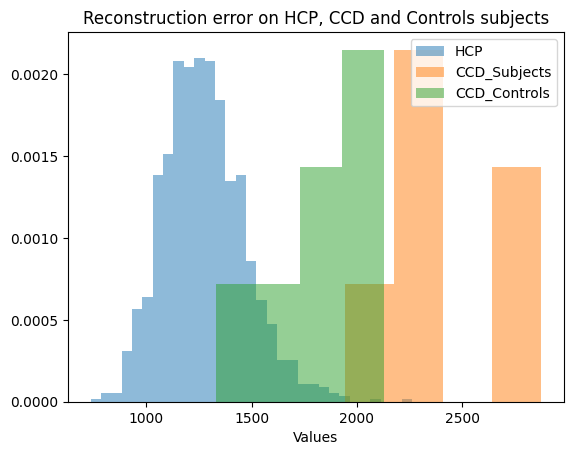

In [26]:
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [27]:
X1 = Embeddings_HCP.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_CCD_Controls.iloc[:,1:76]
X3= Embeddings_CCD_Subjects.iloc[:,1:76]


In [28]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


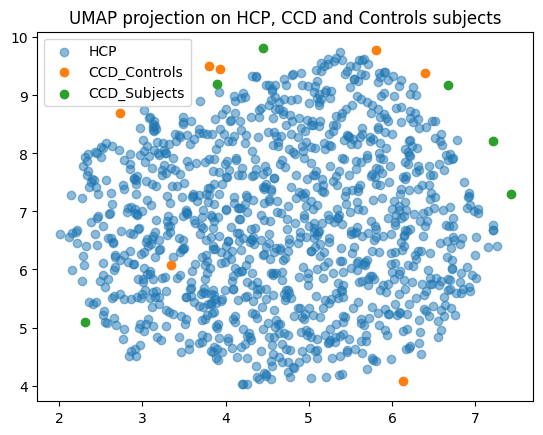

In [29]:
plt.scatter(X1_umap[:,0], X1_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="CCD_Controls")
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Subjects")

plt.title("UMAP projection on HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [30]:
Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [31]:
Reconstruct_error= pd.concat([Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:1.733e-06 U_stat=5.000e+02
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:8.159e-03 U_stat=3.000e+00
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:5.176e-15 U_stat=3.000e+00


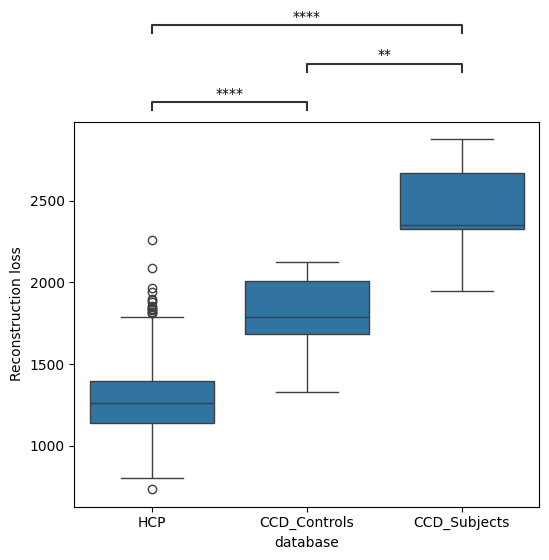

In [32]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()
